In [1]:
import findspark
findspark.init()

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import pandas.io.sql as psql
import seaborn as sns
import numpy as np
import pyspark
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.master("local[1]").appName('ApiData.com').getOrCreate()

In [3]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='password',
    database='creditcard_capstone'
)

cursor = connection.cursor()
sql = "SELECT * FROM CDW_SAPP_loan_application"
cursor.execute(sql)
result_set = cursor.fetchall()
data_frame = psql.read_sql(sql, con=connection)
pd.set_option("display.max_columns", None)
#print(data_frame.head())


cursor.close()
connection.close()

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_24040\1642014810.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = psql.read_sql(sql, con=connection)


In [4]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [ ]:
data_frame

Find and plot the percentage of applications approved for self-employed applicants.

  Self_Employed Application_Status  Application_ID
3           Yes                  Y              92
Percentage of applications approved for self-employed applicants:  3    9.001957
Name: Count_Percent, dtype: float64


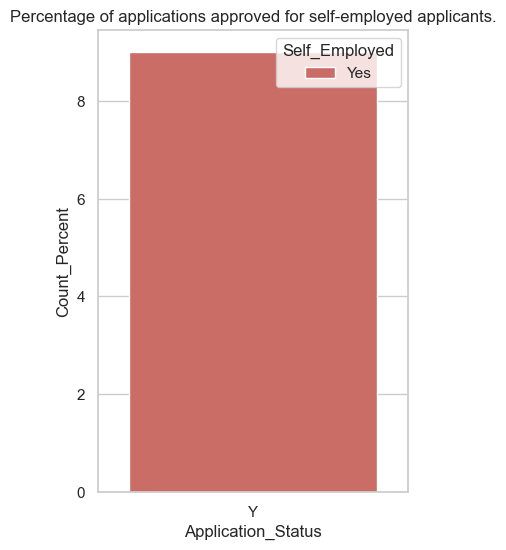

In [6]:
data_api = data_frame.groupby(['Self_Employed','Application_Status'])['Application_ID'].count()
data_api = data_api.reset_index()
total_applications = len(data_frame)
data_api = data_api[(data_api['Application_Status'] == 'Y') & (data_api['Self_Employed'] == 'Yes' ) ]
print(data_api)
data_api['Count_Percent'] = data_api['Application_ID']/total_applications * 100
print("Percentage of applications approved for self-employed applicants: ", data_api['Count_Percent'])
data_api
sns.set(rc={"figure.figsize":(4,6)})
sns.set_theme(style="whitegrid", palette="hls")
sns.barplot(x ='Application_Status',
            y = 'Count_Percent',
            hue='Self_Employed',
            data = data_api).set(title ="Percentage of applications approved for self-employed applicants." )
 
# Show the plot
plt.show()

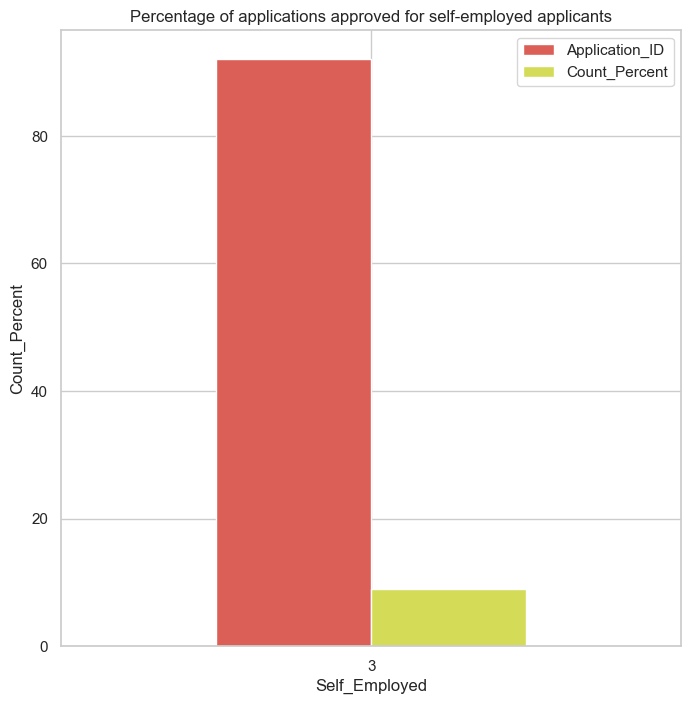

In [7]:
data_api = data_frame.groupby(['Self_Employed','Application_Status'])['Application_ID'].count()
data_api = data_api.reset_index()
total_applications = len(data_frame)
data_api = data_api[(data_api['Application_Status'] == 'Y') & (data_api['Self_Employed'] == 'Yes' ) ]
data_api['Count_Percent'] = data_api['Application_ID']/total_applications * 100
data_api
data_api.plot(kind='bar',rot=0, figsize = (8,8))
plt.title('Percentage of applications approved for self-employed applicants')
plt.xlabel('Self_Employed')
plt.ylabel('Count_Percent')
plt.show()

Find the percentage of rejection for married male applicants.

In [8]:
df_maarried_male = data_frame.groupby(["Married","Application_Status","Gender"])["Application_ID"].count()
df_maarried_male = df_maarried_male.reset_index()
print(df_maarried_male)
total_applications = len(data_frame)
df_maarried_male = df_maarried_male[(df_maarried_male['Married'] == 'Yes') & (df_maarried_male['Application_Status'] == 'N' ) & (df_maarried_male['Gender'] == 'Male')]
df_maarried_male['Count_Percent'] = df_maarried_male['Application_ID']/total_applications * 100
df_maarried_male

  Married Application_Status  Gender  Application_ID
0      No                  N  Female              52
1      No                  N    Male              86
2      No                  Y  Female              80
3      No                  Y    Male             142
4     Yes                  N  Female              16
5     Yes                  N    Male             174
6     Yes                  Y  Female              34
7     Yes                  Y    Male             438


,Married,Application_Status,Gender,Application_ID,Count_Percent
5,Yes,N,Male,174,17.02544


[Text(0.5, 1.0, 'Percentage of rejection for married male applicants.')]

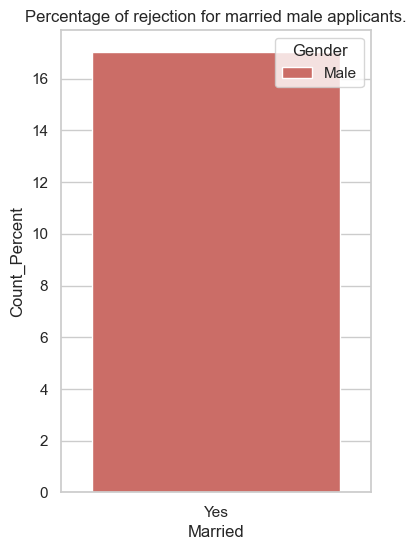

In [9]:
sns.set(rc={"figure.figsize":(4,6)})
sns.set_theme(style="whitegrid", palette="hls")
sns.barplot(x ='Married',
            y = 'Count_Percent',
            hue='Gender',
            data = df_maarried_male).set(title ="Percentage of rejection for married male applicants." )